# Конспект книги "Python для сложных задач" Дж. Вандер Плас

# Глава 3. Манипуляции над данными с помощью пакета Pandas

In [1]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)

2.1.1
2.2.2


## Основные объекты библиотеки Pandas

### Объект Series библиотеки Pandas

Объект Series библиотеки Pandas — одномерный массив индексированных данных. Его можно создавать из списка или массива/

In [2]:
data = pd.Series(np.linspace(0, 1, 5))
data

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

Объект Series поддерживает два типа индексов - явные и неявные. Неявные - это привычные индексы (0, 1...), а явные - индексы, задаваемые пользователем

In [3]:
data = pd.Series(
    np.linspace(0, 1, 5),
    index=['a', 'b', 'c', 'd', 'e'])
data

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [4]:
print(data.iloc[2])
print(data['c'])

0.5
0.5


In [5]:
print(data.iloc[1:3])

b    0.25
c    0.50
dtype: float64


Можно использовать в качестве явных индексов даже целые числа, идущие как попало

In [6]:
data = pd.Series(
    np.linspace(0, 1, 5),
    index=[-1, 5, 3, 8, 1]
)
print(data.iloc[2])
print(data[3])

0.5
0.5


Видно, что Series библиотеки Pandas очень похожи на стандартные словари Python, их различие в том, что в Series все ключи и значения имеют один тип(свой для ключей и значений), что делает их гораздо эффективнее стандартных словарей (на самом деле, Pandas не накладывает никаких ограничений, и у вас получится создать Series  с ключами или значениями разного типа, но это может привести к ошибка в некоторых операциях, например в сортировке). В связи с этим, Series можно создавать из словаря 

In [7]:
population_dict = {'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

В отличие от словаря Series поддерживает характерные для массивов операции, например срезы

In [8]:
print(population['Texas':'Illinois':2])

Texas      26448193
Florida    19552860
dtype: int64


Так же можно получить список явных индексов и список значений

In [9]:
print(population.values)
print(population.index)

[38332521 26448193 19651127 19552860 12882135]
Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')


Рассмотрим другие способы создания Series

In [10]:
print(pd.Series(5, index=['a', 'f', 'b']))

a    5
f    5
b    5
dtype: int64


In [11]:
print(
    pd.Series({2: 'a', 1: 'b', 3: 'c'}, index=[3, 2])
)

3    c
2    a
dtype: object


### Объект DataFrame библиотеки Pandas

Если объект Series — аналог одномерного массива с гибкими индексами, объект DataFrame — аналог двумерного массива с гибкими индексами строк и гибкими
именами столбцов

In [12]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [13]:
states = pd.DataFrame({
    'population': population,
    'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


У объекта DataFrame имеются атрибуты    
index - обеспечивает доступ к меткам индекса    
columns - обеспечивает доступ к меткам стобцов

In [14]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [15]:
states.columns

Index(['population', 'area'], dtype='object')

DataFrame можно рассматривать как специализированный словарь. Если словарь задает соответствие ключей значениям, то DataFrame задает соответствие имени столбца объекту Series с данными этого столбца

In [16]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

Приведём некоторые способы создания объекта DataFrame

In [17]:
# из одного объекта Series
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [18]:
# из списка словарей
pd.DataFrame(
    [{'a': 2 * i, 'b': 4 * i} for i in range(1, 4)]
)

,a,b
0,2,4
1,4,8
2,6,12


In [19]:
# пример с отсутствующими ключами
pd.DataFrame(
    [{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]
)

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [20]:
# из словаря объектов Series
pd.DataFrame(
    {'population': population, 'area': area}
)

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [21]:
# из двумерного массива NumPy
pd.DataFrame(
    np.random.rand(3, 2),
    columns=['foo', 'bar'],
    index=['a', 'b', 'c']
)

,foo,bar
a,0.685794,0.549918
b,0.543188,0.256708
c,0.281411,0.279312


In [22]:
# из структурированного массива NumPy
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
print(A)
pd.DataFrame(A)

[(0, 0.) (0, 0.) (0, 0.)]


,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### Объект Index библиотеки Pandas

Если посмотреть на аттрибут index у Series или DataFrame, то увидим, что он является объектом класса Index

In [23]:
data.index

Index([-1, 5, 3, 8, 1], dtype='int64')

In [24]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Его можно представлять себе как упорядоченное мультимножество или неизменяемый массив

Во многом объект Index ведёт себя как обычный массив. Например, из него можно извлекать срезы

In [25]:
ind = pd.Index([2, 5, 3, 1, 7, 12, 3])
ind

Index([2, 5, 3, 1, 7, 12, 3], dtype='int64')

In [26]:
ind[0]

np.int64(2)

In [27]:
ind[3::-1]

Index([1, 3, 5, 2], dtype='int64')

In [28]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

7 (7,) 1 int64


Индексы неизменяемы, их нельзя модифицировать после создания стандартными средстави, то есть код ind[0] = 1 выдаст ошибку

Объект Index следует большинству соглашений, используемых структурой данных set

In [29]:
indA = pd.Index([4, 5, 6])
indB = pd.Index([4, 3, 2])

In [30]:
print(indA.intersection(indB))
print(indA.join(indB))
print(indA.symmetric_difference(indB))

Index([4], dtype='int64')
Index([4, 5, 6], dtype='int64')
Index([2, 3, 5, 6], dtype='int64')


## Индексация и выборка данных

### Выборка данных из объекта Series

In [31]:
data = pd.Series(
    np.linspace(0, 3, 13),
    [chr(97 + i) for i in range(13)]
)
data

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
h    1.75
i    2.00
j    2.25
k    2.50
l    2.75
m    3.00
dtype: float64

Рассмотрим некоторые методы Series, которые действуют аналогично таковым для словарей

In [32]:
'c' in data

True

In [33]:
data.keys()

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm'], dtype='object')

In [34]:
list(data.items())

[('a', 0.0),
 ('b', 0.25),
 ('c', 0.5),
 ('d', 0.75),
 ('e', 1.0),
 ('f', 1.25),
 ('g', 1.5),
 ('h', 1.75),
 ('i', 2.0),
 ('j', 2.25),
 ('k', 2.5),
 ('l', 2.75),
 ('m', 3.0)]

In [35]:
# расширение объекта
data['n'] = 3.25
data

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
h    1.75
i    2.00
j    2.25
k    2.50
l    2.75
m    3.00
n    3.25
dtype: float64

Рассмотрим некоторые методы Series, которые действуют аналогично таковым для массивов

In [36]:
# при срезе по явному индексу правая граница берётся
data['c':'i':2]

c    0.5
e    1.0
g    1.5
i    2.0
dtype: float64

In [37]:
# при срезе по неявному индексу правая граница не берётся
data.iloc[2:8:2]

c    0.5
e    1.0
g    1.5
dtype: float64

In [38]:
# маскирование
data[(data > 0.5) & (data <= 1.5) & (data != 1)]

d    0.75
f    1.25
g    1.50
dtype: float64

In [39]:
# прихотливая индексация
data[['e', 'n']]

e    1.00
n    3.25
dtype: float64

In [40]:
# срезы и явные индексы, заданные целыми числами
data = pd.Series(
    np.arange(5),
    2 * np.arange(5)
)
data

0    0
2    1
4    2
6    3
8    4
dtype: int64

In [41]:
# для среза используется неявный индекс
data[2:4]

4    2
6    3
dtype: int64

Эту проблему решает атрибут loc, который позволяет выполнять индексацию и срезы с использованием явного индекса

In [42]:
data.loc[2:4]

2    1
4    2
dtype: int64

In [43]:
data.loc[2]

np.int64(1)

In [44]:
data[2]

np.int64(1)

Атрибут iloc делает то же самое, только с использованием неявного индекса

In [45]:
data.iloc[2]

np.int64(2)

In [46]:
data.iloc[2:4]

4    2
6    3
dtype: int64

### Выборка данных из объекта DataFrame

In [47]:
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


DataFrame можно представлять как словарь схожих между собой объектов Series. Каждый Series - столбец таблицы, поэтому можно обращаться по имени столбца

In [48]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [49]:
states.population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [50]:
states.population is states['population']

True

Доступ к столбцу как к атрибуту класса возможен не всегда

In [51]:
# как и в Series, можно модифицировать DataFrame
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


DataFrame можно представлять себе как двумерный массив с расширенными возможностями

In [52]:
states.values

array([[3.83325210e+07, 4.23967000e+05, 9.04139261e+01],
       [2.64481930e+07, 6.95662000e+05, 3.80187404e+01],
       [1.96511270e+07, 1.41297000e+05, 1.39076746e+02],
       [1.95528600e+07, 1.70312000e+05, 1.14806121e+02],
       [1.28821350e+07, 1.49995000e+05, 8.58837628e+01]])

In [53]:
# транспонирование DataFrame
states.T

,California,Texas,New York,Florida,Illinois
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


Чтобы не было путаницы с индексацией (в массиве [0] - обращение к первой строке, в DataFrame - к первому столбцу), стоит использовать loc, iloc и ix

iloc позволяет индексировать DataFrame так, будто это просто массив NumPy

In [54]:
states.iloc[:3, :2]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


loc позволяет использовать при этом явные индексы

In [55]:
states.loc[:'New York', :'area']

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [56]:
# пример комбинирования явных и неявных индексов
states.loc[:, 'area'].iloc[:3]

California    423967
Texas         695662
New York      141297
Name: area, dtype: int64

С DataFrame так же работают приёмы маскирования и прихотливой индексации 

In [57]:
states.loc[states['population'] > 19552860, ::-1]

,density,area,population
California,90.413926,423967,38332521
Texas,38.018740,695662,26448193
New York,139.076746,141297,19651127


Таким образом можно менять значения в таблице

In [58]:
states.loc[:, ['population', 'density']] = 2 * states.loc[:, ['population', 'density']]
states

,population,area,density
California,76665042,423967,180.827852
Texas,52896386,695662,76.037481
New York,39302254,141297,278.153492
Florida,39105720,170312,229.612241
Illinois,25764270,149995,171.767526


Если просто индексация через [] относится к столбцам, то срезы относятся к строкам

In [59]:
states['California':'New York']

,population,area,density
California,76665042,423967,180.827852
Texas,52896386,695662,76.037481
New York,39302254,141297,278.153492


Так же и с маскированием

In [60]:
states[states['density'] > 180]

,population,area,density
California,76665042,423967,180.827852
New York,39302254,141297,278.153492
Florida,39105720,170312,229.612241


## Операции над данными в библиотеке Pandas

### Универсальные функции

Все универсальные функции библиотеки NumPy будут работать с объектами Series и DataFrame


In [61]:
ser = pd.Series(
    np.random.randint(0, 30, 10), 
    index=[chr(97 + i) for i in range(10)])
ser

a     7
b    28
c    12
d     1
e    24
f    15
g     8
h     3
i    24
j    19
dtype: int32

In [62]:
df = pd.DataFrame(
    np.random.randint(0, 30, (5, 10)),
    columns=[chr(65 + i) for i in range(10)],
    index=[chr(97 + i) for i in range(5)]
    )
df

,A,B,C,D,E,F,G,H,I,J
a,9,24,15,22,24,12,0,15,26,15
b,19,4,11,17,13,21,8,7,21,10
c,11,7,1,3,9,8,10,23,17,3
d,14,22,17,4,2,11,24,12,0,6
e,28,16,25,10,6,26,2,13,2,11


При применение универсальных функций к объектам DataFrame и Series, будет создан новый объект библиотеки Pandas с сохранением индексов

In [63]:
np.sin(ser)

a    0.656987
b    0.270906
c   -0.536573
d    0.841471
e   -0.905578
f    0.650288
g    0.989358
h    0.141120
i   -0.905578
j    0.149877
dtype: float64

In [64]:
np.sin(df)

,A,B,C,D,E,F,G,H,I,J
a,0.412118,-0.905578,0.650288,-0.008851,-0.905578,-0.536573,0.000000,0.650288,0.762558,0.650288
b,0.149877,-0.756802,-0.999990,-0.961397,0.420167,0.836656,0.989358,0.656987,0.836656,-0.544021
c,-0.999990,0.656987,0.841471,0.141120,0.412118,0.989358,-0.544021,-0.846220,-0.961397,0.141120
d,0.990607,-0.008851,-0.961397,-0.756802,0.909297,-0.999990,-0.905578,-0.536573,0.000000,-0.279415
e,0.270906,-0.287903,-0.132352,-0.544021,-0.279415,0.762558,0.909297,0.420167,0.909297,-0.999990


In [65]:
np.sin(df * np.pi - np.pi / 2)

,A,B,C,D,E,F,G,H,I,J
a,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
b,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
c,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
d,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
e,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0


### Выравнивание индексов

In [66]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
    'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
    'New York': 19651127}, name='population')

In [67]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

Получился новый объект Series, у которого атрибут Indexes является объединением индексов и Series, учавствовавших в операции

In [68]:
population.index.union(area.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Аналогичным образом реализовано сопоставление индексов для всех встроенных арифметических выражений языка Python: все отсутствующие значения заполняются по умолчанию значением NaN

In [69]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Если необходимо заполнить отсутствующие данные, то можно вызвать соответствующий операции метод объекта, указав значение потенциально отсутствующих элементов

In [70]:
B.add(A, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

При работе с DataFrame происходит аналогичное выравнивание как по столбцам, так и по индексам

In [71]:
df1 = pd.DataFrame(
    np.random.randint(0, 30, (2, 2)),
    columns=['A', 'B']
)
df2 = pd.DataFrame(
    np.random.randint(0, 30, (3, 2)),
    columns=['C', 'B']
)
print(df1)
print(df2)

   A  B
0  6  0
1  4  3
    C   B
0  17  23
1   1  20
2  28  11


In [72]:
df1 * df2

,A,B,C
0,NaN,0.0,NaN
1,NaN,60.0,NaN
2,NaN,NaN,NaN


In [73]:
df1.multiply(df2, fill_value=1)

,A,B,C
0,6.0,0.0,17.0
1,4.0,60.0,1.0
2,NaN,11.0,28.0


In [74]:
df1.multiply(df2, fill_value=1).fillna(0)

,A,B,C
0,6.0,0.0,17.0
1,4.0,60.0,1.0
2,0.0,11.0,28.0


In [75]:
df1.stack()

0  A    6
   B    0
1  A    4
   B    3
dtype: int32

In [76]:
df1.stack().mean()

np.float64(3.25)

In [77]:
df1.add(df2, fill_value=df1.stack().mean())

,A,B,C
0,9.25,23.00,20.25
1,7.25,23.00,4.25
2,NaN,14.25,31.25


Приведём таблицу методов, соответствующих операторам    
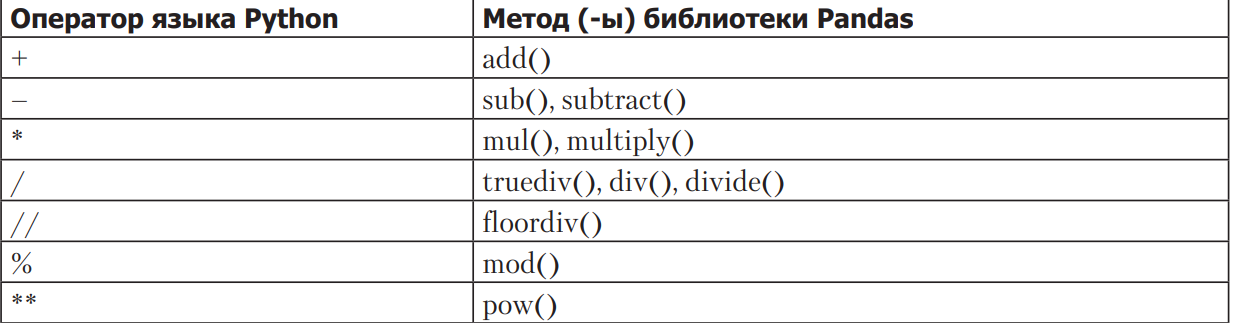

## Универсальные функции: выполнение операции между объектами DataFrame и Series 

Операции между DataFrame и Series осуществляется аналогично операциям между двумерным и одномерным массивами, с применением правил выравнивания индексов

In [78]:
arr = np.random.randint(10, size=(5, 6))
arr

array([[5, 2, 1, 7, 1, 1],
       [0, 0, 0, 7, 8, 1],
       [9, 4, 8, 1, 6, 8],
       [5, 8, 9, 8, 0, 4],
       [6, 1, 4, 3, 9, 5]], dtype=int32)

In [79]:
arr - arr[0]

array([[ 0,  0,  0,  0,  0,  0],
       [-5, -2, -1,  0,  7,  0],
       [ 4,  2,  7, -6,  5,  7],
       [ 0,  6,  8,  1, -1,  3],
       [ 1, -1,  3, -4,  8,  4]], dtype=int32)

Операция произошла в соответствие с правилами транслирования

In [80]:
df = pd.DataFrame(arr, columns=list('ABCDEF'))
df

,A,B,C,D,E,F
0,5,2,1,7,1,1
1,0,0,0,7,8,1
2,9,4,8,1,6,8
3,5,8,9,8,0,4
4,6,1,4,3,9,5


In [81]:
df - df.iloc[0]

,A,B,C,D,E,F
0,0,0,0,0,0,0
1,-5,-2,-1,0,7,0
2,4,2,7,-6,5,7
3,0,6,8,1,-1,3
4,1,-1,3,-4,8,4


Методы объектов позволяют явно указывать измерение, по которому будет выполняться операция

In [82]:
df.subtract(df['B'], axis=0)

,A,B,C,D,E,F
0,3,0,-1,5,-1,-1
1,0,0,0,7,8,1
2,5,0,4,-3,2,4
3,-3,0,1,0,-8,-4
4,5,0,3,2,8,4


In [83]:
#пример про выравнивание индексов
df = pd.DataFrame(
    np.random.randint(0, 30, (5, 5)),
    columns=list('ABCDE'),
    index=list('abcde')
)
ser = pd.Series(
    np.random.randint(0, 30, 3),
    index=list('ABC')
)
print(ser)
print(df)

A     7
B    17
C    29
dtype: int32
    A   B   C   D   E
a   9  11  19   3   1
b   6   9  16  18  26
c   1  25  28   4  27
d  16   9   3  21   4
e   1  19  18  20  25


In [84]:
df + ser

,A,B,C,D,E
a,16.0,28.0,48.0,NaN,NaN
b,13.0,26.0,45.0,NaN,NaN
c,8.0,42.0,57.0,NaN,NaN
d,23.0,26.0,32.0,NaN,NaN
e,8.0,36.0,47.0,NaN,NaN


Тут уже методы операторов с fill_value не работают

In [85]:
ser = pd.Series(
    np.random.randint(0, 30, 3),
    index=list('abc')
)
print(ser)

a     4
b     2
c    27
dtype: int32


In [86]:
df.add(ser, axis=0)

,A,B,C,D,E
a,13.0,15.0,23.0,7.0,5.0
b,8.0,11.0,18.0,20.0,28.0
c,28.0,52.0,55.0,31.0,54.0
d,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN


## Обработка отсутствующих данных

Отсутствующие значения в библиотеке Pandas помечаются 2мя способами - меткой NaN и None

None - объект Python, поэтому он может использоваться только в массивах с типом данных 'object'

In [87]:
vals1 = np.array([1, 2, 3, None, 5])
vals1

array([1, 2, 3, None, 5], dtype=object)

Все операции с таким массивом будут выполняться стандартными средствами языка Python (потому что всё, что библиотека смогла сказать о типе данных массива - это то, что это объекты типа object, и никак не использует информацию о том, что все содержательные элементы - целые числа)

NaN означает отсутствующее числовое значение, которое является значением с плавающей точкой

In [88]:
vals2 = np.array([1, 2, 3, np.nan, 5])
print(vals2)
print(vals2.dtype)

[ 1.  2.  3. nan  5.]
float64


Любая арифметичческая операция с участием NaN вернёт NaN

In [89]:
np.sin(np.nan)

np.float64(nan)

In [90]:
3.14 * np.nan

nan

In [91]:
vals2.sum()

np.float64(nan)

Библиотека NumPy предоставляет функции, способные игнорировать эти пропущенные значения

In [92]:
np.nansum(np.sin(vals2))

np.float64(0.9329641450303069)

In [93]:
np.nanmin(np.exp2(vals2))

np.float64(2.0)

Библиотека Pandas автоматически заменяет эти два значения друг на друга когда ей это нужно

In [94]:
pd.Series([1, np.nan, 3, None])

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

Существует несколько удобных методов для обнаружения, удаления и замены пустых значений в структурах данных библиотеки Pandas, призванных упростить работу с ними    
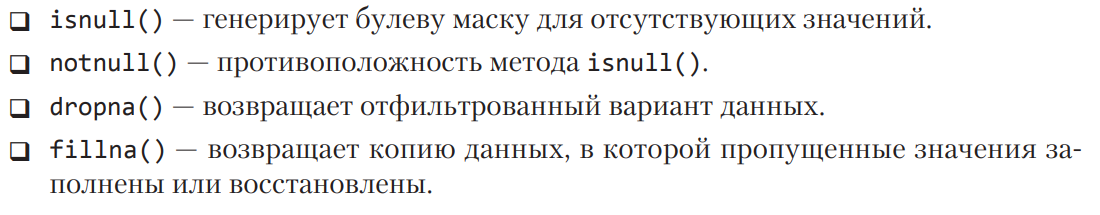

In [95]:
ser = pd.Series([1, np.nan, 'hh', None])
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [96]:
ser[ser.notnull()]

0     1
2    hh
dtype: object

In [97]:
ser.dropna(inplace=True)
ser

0     1
2    hh
dtype: object

In [98]:
df = pd.DataFrame(
    np.random.randint(0, 30, (3, 3)),
    index = list('abc'),
    columns = list('ABC')
)
df


,A,B,C
a,19,7,7
b,11,5,13
c,0,29,23


In [99]:
df.loc['a', 'A'] = np.nan
df.loc['c', 'B'] = np.nan
df

,A,B,C
a,NaN,7.0,7
b,11.0,5.0,13
c,0.0,NaN,23


In [100]:
# по умолчанию dropna для df отбрасывает все строки с отсутствующими значениями
df.dropna()

,A,B,C
b,11.0,5.0,13


In [101]:
df.dropna(axis='columns')

,C
a,7
b,13
c,23


In [102]:
df.loc[:, 'D'] = np.nan
df.loc['d'] = np.nan
df

,A,B,C,D
a,NaN,7.0,7.0,NaN
b,11.0,5.0,13.0,NaN
c,0.0,NaN,23.0,NaN
d,NaN,NaN,NaN,NaN


Если параметр how равен 'any'(по умолчанию) отбрасывает строку(столбец), если в ней есть хоть один nan, если 'all', то если все значения таковы 

In [103]:
df.dropna(how='all', axis='columns')

,A,B,C
a,NaN,7.0,7.0
b,11.0,5.0,13.0
c,0.0,NaN,23.0
d,NaN,NaN,NaN


Параметр tresh устанавливает минимальное количество непустых значений, при котором измерение выбрасывается

In [104]:
df.loc['b', 'B'] = np.nan
df

,A,B,C,D
a,NaN,7.0,7.0,NaN
b,11.0,NaN,13.0,NaN
c,0.0,NaN,23.0,NaN
d,NaN,NaN,NaN,NaN


In [105]:
df.dropna(axis='columns', thresh=2)

,A,C
a,NaN,7.0
b,11.0,13.0
c,0.0,23.0
d,NaN,NaN


fillna() заполняет отсутствующие значения тем, что подаётся ему на вход

In [106]:
df.fillna(12312)

,A,B,C,D
a,12312.0,7.0,7.0,12312.0
b,11.0,12312.0,13.0,12312.0
c,0.0,12312.0,23.0,12312.0
d,12312.0,12312.0,12312.0,12312.0


In [107]:
# пустые ячейки заполняются значениями сверху
df.ffill()

,A,B,C,D
a,NaN,7.0,7.0,NaN
b,11.0,7.0,13.0,NaN
c,0.0,7.0,23.0,NaN
d,0.0,7.0,23.0,NaN


In [108]:
# пустые ячейки заполняются значениями снизу
df.bfill()

,A,B,C,D
a,11.0,7.0,7.0,NaN
b,11.0,NaN,13.0,NaN
c,0.0,NaN,23.0,NaN
d,NaN,NaN,NaN,NaN


In [109]:
# пустые ячейки заполняются значениями слева
df.ffill(axis=1)

,A,B,C,D
a,NaN,7.0,7.0,7.0
b,11.0,11.0,13.0,13.0
c,0.0,0.0,23.0,23.0
d,NaN,NaN,NaN,NaN


## Иерархическая индексация

### Мультииндексы

При необходимости завести "таблицу" с более чем 2мя измерениями, в библиотеке реализованы объекты Panel и Panel4D для 3ёх и 4ёх измерений

Но на практике чаще всего используется другой инструмент - иерархическая индексация(мультииндексация), который позволяет включить в один индекс несколько уровней

In [110]:
index = [('California', 2000), ('California', 2010), 
        ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]

In [111]:
multi = pd.MultiIndex.from_tuples(index)

In [112]:
multi

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [113]:
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
ser = pd.Series(populations, index=multi)
ser

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [114]:
ser[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [115]:
ser.loc[['California', 'Texas'], 2000]

California  2000    33871648
Texas       2000    20851820
dtype: int64

Можно преобразовать мультииндексный объект Series в DataFrame и наоборот

In [116]:
df = ser.unstack()
df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [117]:
df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Пример расширения таблицы с помощью мультииндекса

In [118]:
df = pd.DataFrame({
    'total': ser,
    'under18': [9267089, 9284094, 4687374, 4318033,  5906301, 6879014]
})
df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

При этом универсальные функции работают с иерархическими индексациями

In [119]:
p_u18 = df['under18'] / df['total']
p_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [120]:
type(p_u18)

pandas.core.series.Series

In [121]:
p_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Методы создания мультииндексов

In [122]:
df = pd.DataFrame(
    np.random.randint(0, 30, (4, 3)),
    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
    columns=['A', 'B', 'C']
)
df

A   B   C
a 1   2  16   9
  2  19  10  25
b 1   0   5  26
  2  13   2  26

In [123]:
data = {
    ('California', 2000): 33871648,
    ('California', 2010): 37253956,
    ('Texas', 2000): 20851820,
    ('Texas', 2010): 25145561,
    ('New York', 2000): 18976457,
    ('New York', 2010): 19378102
}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [124]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [125]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [126]:
m = pd.MultiIndex.from_product([['a', 'b'], [1, 2], ['A', 'B']])
t_s = pd.Series(np.random.randint(0, 30, 8), index=m)
t_s

a  1  A     1
      B     6
   2  A    10
      B    27
b  1  A    23
      B    27
   2  A     9
      B    28
dtype: int32

In [127]:
pd.MultiIndex(
    levels=[['a', 'b'], [1, 2]],
    codes=[[0, 0, 1, 1], [0, 1, 0, 1]]
)

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Уровням индекса можно давать названия

In [128]:
m = pd.MultiIndex.from_product([['a', 'b'], [1, 2], ['A', 'B']])
m.names = ['name1', 'nam2', 'name3']
m

MultiIndex([('a', 1, 'A'),
            ('a', 1, 'B'),
            ('a', 2, 'A'),
            ('a', 2, 'B'),
            ('b', 1, 'A'),
            ('b', 1, 'B'),
            ('b', 2, 'A'),
            ('b', 2, 'B')],
           names=['name1', 'nam2', 'name3'])

In [129]:
s = pd.Series(np.random.randint(0, 30, 8), m)
s

name1  nam2  name3
a      1     A        11
             B         3
       2     A        14
             B        15
b      1     A        27
             B         8
       2     A        13
             B        11
dtype: int32

У стобцовв тоже может быть мультииндекс

In [130]:
index = pd.MultiIndex.from_product(
    [[2013, 2014], [1, 2]],
    names=['year', 'visit']
)
columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'],
    ['HR', 'Temp']],
    names=['subject', 'type']
)

In [131]:
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [132]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  36.5  34.0  35.0  33.0  37.3
     2      20.0  35.1  41.0  37.5  31.0  37.9
2014 1      47.0  38.0  34.0  35.4  48.0  36.9
     2      40.0  36.9  36.0  38.6  47.0  37.4

In [133]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      34.0  35.0
     2      41.0  37.5
2014 1      34.0  35.4
     2      36.0  38.6

### Индексация и срезы по мультииндексу

In [134]:
ser.index.names = ['state', 'year']
ser

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [135]:
ser['California', 2000]

np.int64(33871648)

In [136]:
ser['Texas']

year
2000    20851820
2010    25145561
dtype: int64

In [137]:
ser.loc['California':'New York', 2000]

state       year
California  2000    33871648
New York    2000    18976457
dtype: int64

In [138]:
ser[:, 2010]

state
California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [139]:
#ser['California':'New York', 2010] уже выдаёт ошибку

In [140]:
ser[ser > 22_000_000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [141]:
ser.loc[['Texas', 'California'], 2010]

state       year
Texas       2010    25145561
California  2010    37253956
dtype: int64

In [142]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  36.5  34.0  35.0  33.0  37.3
     2      20.0  35.1  41.0  37.5  31.0  37.9
2014 1      47.0  38.0  34.0  35.4  48.0  36.9
     2      40.0  36.9  36.0  38.6  47.0  37.4

In [143]:
health_data['Bob', 'Temp']

year  visit
2013  1        36.5
      2        35.1
2014  1        38.0
      2        36.9
Name: (Bob, Temp), dtype: float64

In [144]:
health_data['Bob']

type          HR  Temp
year visit            
2013 1      34.0  36.5
     2      20.0  35.1
2014 1      47.0  38.0
     2      40.0  36.9

In [145]:
health_data.iloc[:3, 1:]

subject      Bob Guido         Sue      
type        Temp    HR  Temp    HR  Temp
year visit                              
2013 1      36.5  34.0  35.0  33.0  37.3
     2      35.1  41.0  37.5  31.0  37.9
2014 1      38.0  34.0  35.4  48.0  36.9

In [146]:
# срезы работают криво
health_data.loc[3:, ('Bob', 'Temp')]

year  visit
2013  1        36.5
      2        35.1
2014  1        38.0
      2        36.9
Name: (Bob, Temp), dtype: float64

Для работы со срезами есть IndexSlice

In [147]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx['Bob':'Guido', 'HR']]

,subject,Bob,Guido
,type,HR,HR
year,visit,,
2013,1,34.0,34.0
2014,1,47.0,34.0


### Перегруппировка мультииндексов

Срезы с мультииндексами не будут работать если они не отсортированы

In [148]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [2, 1]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     2      0.201128
      1      0.473601
c     2      0.313652
      1      0.564552
b     2      0.522116
      1      0.572525
dtype: float64

In [149]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Для сортировки индекса существует метод sort_index

In [150]:
data.sort_index(inplace=True)
data

char  int
a     1      0.473601
      2      0.201128
b     1      0.572525
      2      0.522116
c     1      0.564552
      2      0.313652
dtype: float64

In [151]:
data['a':'b']

char  int
a     1      0.473601
      2      0.201128
b     1      0.572525
      2      0.522116
dtype: float64

Методу unstack можно передавать параметр level

In [152]:
data

char  int
a     1      0.473601
      2      0.201128
b     1      0.572525
      2      0.522116
c     1      0.564552
      2      0.313652
dtype: float64

In [153]:
data.unstack(level=1)

int,1,2
char,,
a,0.473601,0.201128
b,0.572525,0.522116
c,0.564552,0.313652


In [154]:
data.unstack(level=0)

char,a,b,c
int,,,
1,0.473601,0.572525,0.564552
2,0.201128,0.522116,0.313652


In [155]:
idx = pd.MultiIndex.from_product([['A', 'B'], ['a', 'b'], [1, 2]])
ser = pd.Series(
    np.random.randint(0, 30, 8),
    index=idx
)
ser


A  a  1     9
      2    28
   b  1    21
      2    17
B  a  1    20
      2    21
   b  1    16
      2    25
dtype: int32

In [156]:
ser.unstack()

1   2
A a   9  28
  b  21  17
B a  20  21
  b  16  25

In [157]:
ser.unstack(level=2)

1   2
A a   9  28
  b  21  17
B a  20  21
  b  16  25

In [158]:
ser.unstack(level=1)

a   b
A 1   9  21
  2  28  17
B 1  20  16
  2  21  25

In [159]:
ser.unstack(level=0)

A   B
a 1   9  20
  2  28  21
b 1  21  16
  2  17  25

In [160]:
ser.unstack(level=2).stack()

A  a  1     9
      2    28
   b  1    21
      2    17
B  a  1    20
      2    21
   b  1    16
      2    25
dtype: int32

Когда вы вызываете reset_index(), текущий индекс сбрасывается, и создаётся новый индекс по умолчанию (обычно это последовательные целые числа). Старый индекс может быть добавлен как новый столбец в DataFrame, если не указать иначе(drop=True - удаляет индекс)

In [161]:
ser.reset_index(name='name')

,level_0,level_1,level_2,name
0,A,a,1,9
1,A,a,2,28
2,A,b,1,21
3,A,b,2,17
4,B,a,1,20
5,B,a,2,21
6,B,b,1,16
7,B,b,2,25


In [162]:
ser.reset_index(drop=True)

0     9
1    28
2    21
3    17
4    20
5    21
6    16
7    25
dtype: int32

In [163]:
df = pd.DataFrame(
    np.random.randint(0, 30, (8, 4)),
    index=idx,
    columns=pd.MultiIndex.from_product([['aa', 'bb'], [11, 22]])
)
df

aa      bb    
       11  22  11  22
A a 1  26   7  12  28
    2   0  13  24   3
  b 1  15  29  11  10
    2  22  29  13   1
B a 1  24  28  12   5
    2   8  12  21  11
  b 1   8  14  18  27
    2  23   8  13  23

In [164]:
df.reset_index()

level_0 level_1 level_2  aa      bb    
                           11  22  11  22
0       A       a       1  26   7  12  28
1       A       a       2   0  13  24   3
2       A       b       1  15  29  11  10
3       A       b       2  22  29  13   1
4       B       a       1  24  28  12   5
5       B       a       2   8  12  21  11
6       B       b       1   8  14  18  27
7       B       b       2  23   8  13  23

In [165]:
ddf = df.reset_index(drop=True)
ddf

aa      bb    
   11  22  11  22
0  26   7  12  28
1   0  13  24   3
2  15  29  11  10
3  22  29  13   1
4  24  28  12   5
5   8  12  21  11
6   8  14  18  27
7  23   8  13  23

Метод set_index позволяет создать мультииндекс из значений столбцов

In [166]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
})
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,Berlin


In [167]:
df.set_index('Name')

,Age,City
Name,,
Alice,25,New York
Bob,30,Paris
Charlie,35,Berlin


In [168]:
df.set_index(['Name', 'Age'], append=True)

,,,City
,Name,Age,
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,Berlin


Так же в библиотеке реализована возможность агрегирования данных по мультииндексам

In [169]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  36.5  34.0  35.0  33.0  37.3
     2      20.0  35.1  41.0  37.5  31.0  37.9
2014 1      47.0  38.0  34.0  35.4  48.0  36.9
     2      40.0  36.9  36.0  38.6  47.0  37.4

In [170]:
health_data.groupby('year').mean()

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     27.0  35.80  37.5  36.25  32.0  37.60
2014     43.5  37.45  35.0  37.00  47.5  37.15

In [171]:
health_data.groupby('year')['Bob'].median()

subject   Bob       
type       HR   Temp
year                
2013     27.0  35.80
2014     43.5  37.45

In [172]:
health_data.loc[:, (pd.IndexSlice[:], 'HR')].groupby('year').max()

subject,Bob,Guido,Sue
type,HR,HR,HR
year,,,
2013,34.0,41.0,33.0
2014,47.0,36.0,48.0


## Объединение наборов данных: конкатенация и добавление в конец

In [173]:
def make_df(cols, ind):
    '''Быстро создаем объект DataFrame'''
    data = {c:[str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [174]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


Вспомним конкатенацию NumPy массивов

In [175]:
np.concatenate([
    np.array([1, 2, 3]),
    np.array([4, 5, 6]),
    np.array([7, 8, 9])
])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [176]:
np.concatenate([
    np.array([[1, 2], [3, 4]]),
    np.array([[5, 6], [7, 8]])],
    axis=1
)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

Функция pd.concat используется для простой конкатенации объектов Series и DataFrame

In [177]:
pd.concat([
    pd.Series([1, 2, 3], index=['a', 'b', 'c']),
    pd.Series([4, 5, 6], index=['d', 'e', 'f'])
])

a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

In [178]:
pd.concat([
    make_df('AB', [1, 2]),
    make_df('CD', [3, 4])
])

,A,B,C,D
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,C3,D3
4,NaN,NaN,C4,D4


In [179]:
pd.concat([
    make_df('AB', [1, 2]),
    make_df('AB', [3, 4])
])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [180]:
pd.concat([
    make_df('AB', [1, 2]),
    make_df('CD', [1, 2])],
    axis='columns'
)

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2


Выше видно, что функция может сохранить индексы даже если это приведёт к их дублированию

Это может быть нежелательно, поэтому рассмотрим способы избежать такой исход

In [181]:
x = make_df('AB', [0, 1])
y = make_df('AB', [0, 1])
pd.concat([x, y])

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [182]:
# выдавать ошибку
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print('ValueError: ', e)

ValueError:  Indexes have overlapping values: Index([0, 1], dtype='int64')


In [183]:
# игнорирование индекса
# создаёт новый целочисленный индекс
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


In [184]:
pd.concat([x, y], axis='columns', ignore_index=True)

,0,1,2,3
0,A0,B0,A0,B0
1,A1,B1,A1,B1


In [185]:
# добавление мультииндекса
pd.concat([x, y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A0  B0
  1  A1  B1

Есть возможность соединять таблицы по ключу, как в sql

In [186]:
df1 = make_df('ABC', [1, 2])
df2 = make_df('BCD', [3, 4])
print(df1)
print(df2)

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [187]:
# тут join='outer'
print(pd.concat([df1, df2]))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [188]:
pd.concat([df1, df2], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


В старых версиях можно было явно указать ось, по которой происходит соединение, сейчас это делается с использованием метода reindex

In [189]:
df2.reindex(columns=['B'])

,B
3,B3
4,B4


In [190]:
pd.concat([df1, df2.reindex(columns=['B'])], join='inner', )

,B
1,B1
2,B2
3,B3
4,B4


## Объединение наборов данных: слияние и соединение

Функция pd.merge и метод join предоставляет интерфейс для соединения и слияния наборов данных, схожий по функционалу с реляционными базами данных, причём эти опперации выполняются в оперативной памяти, что обеспечивает их скорость

### Соединения «один-к-одному»

In [191]:
df1 = pd.DataFrame(
    {'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']}
)
df2 = pd.DataFrame(
    {'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014]}
)
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [192]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Заметим, что слияние проигнорировало индекс(у Jake в первой таблице индекс 1, во второй - 2)

### Соединения «многие-к-одному»

In [193]:
df4 = pd.DataFrame(
    {'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve']}
)
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [194]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


### Соединения «многие-ко-многим»

In [195]:
df5 = pd.DataFrame(
    {'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']}
)
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [196]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [197]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


### Задание ключа слияния

В функции pd.merge имеется аргумент on, который указывает на столбец, по которому нужно произвести слияние

In [198]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Если имена столбцов в таблицах, которые надо слить, различны, то есть аргументы left_on и right_on

In [199]:
df3 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000]
})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [200]:
df6 = pd.merge(df1, df3, left_on='employee', right_on='name')
df6

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


Лишний столбец name можно удалить методом drop

In [201]:
df6.drop('employee', axis='columns', inplace=True)
df6

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


Для слияние по индексу предусмотрена аргументы left_index и right_index, которые принимают булевы значения

In [202]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
df6a = df6.set_index('name')

In [203]:
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [204]:
df2a

,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [205]:
df6a

,group,salary
name,,
Bob,Accounting,70000
Jake,Engineering,80000
Lisa,Engineering,120000
Sue,HR,90000


In [206]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [207]:
# дублируется столбец group, чтобы не было надо ресетить индексы
pd.merge(df1a, df6a, left_index=True, right_index=True)

,group_x,group_y,salary
employee,,,
Bob,Accounting,Accounting,70000
Jake,Engineering,Engineering,80000
Lisa,Engineering,Engineering,120000
Sue,HR,HR,90000


Есть метод join, который по умолчанию выполняет слияние по индексу

In [208]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [209]:
#df1a.join(df6a) выдаёт ошибку из-за того что есть одинаковый столбец

Для выполнения слияния по индексу и столбцам можно использовать сочетание left_index и right_on или наоборот

In [210]:
df7 = pd.DataFrame(
    {
        'name': ['Peter', 'Paul', 'Mary'],
        'food': ['fish', 'beans', 'bread']
    },
    columns=['name', 'food']
)
df8 = pd.DataFrame(
    {'name': ['Mary', 'Joseph'],
    'drink': ['wine', 'beer']
    },
    columns=['name', 'drink']
)

In [211]:
df7

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [212]:
df8

,name,drink
0,Mary,wine
1,Joseph,beer


In [213]:
pd.merge(df7, df8)

,name,food,drink
0,Mary,bread,wine


По умолчанию результатом будет inner join(пересечение), но можно поменять аргуменнт how на 'outer', 'left', 'right'

In [214]:
pd.merge(df7, df8, how='outer')

,name,food,drink
0,Joseph,NaN,beer
1,Mary,bread,wine
2,Paul,beans,NaN
3,Peter,fish,NaN


In [215]:
pd.merge(df7, df8, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [216]:
pd.merge(df7, df8, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


Иногда могут возникнуть конфликтующие названия столбцов

In [217]:
df9 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'rank': [1, 2, 3, 4]
})
df10 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'rank': [3, 1, 4, 2]
})

In [218]:
pd.merge(df9, df10, on='name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


Для конфликтующих названий можно вручную задать суффиксы с помощью аргумента suffixes

In [219]:
pd.merge(df9, df10, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Агрегирование и группировка

In [220]:
import seaborn as sns

In [221]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [222]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Для объекта Series работают агрегирующие функции библиотеки NumPy

In [223]:
pd.Series([0, 1, 2, 3, 4]).median()

np.float64(2.0)

Для объекта DataFrame эти функции возвращают вычисляемое значение по столбцам, но можно указать параметр axis

In [224]:
df = pd.DataFrame(
    np.random.randint(0, 30, (5, 3)),
    index = range(5),
    columns=list('ABC')
)
df

,A,B,C
0,4,16,18
1,29,11,17
2,26,15,2
3,24,23,22
4,28,5,21


In [225]:
df.mean()

A    22.2
B    14.0
C    16.0
dtype: float64

In [226]:
df.mean(axis='columns')

0    12.666667
1    19.000000
2    14.333333
3    23.000000
4    18.000000
dtype: float64

Есть метод describe, который возвращает сразу несколько самых распространённых свобдных показателей

In [227]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [228]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Приведём список агрегирующих функций    
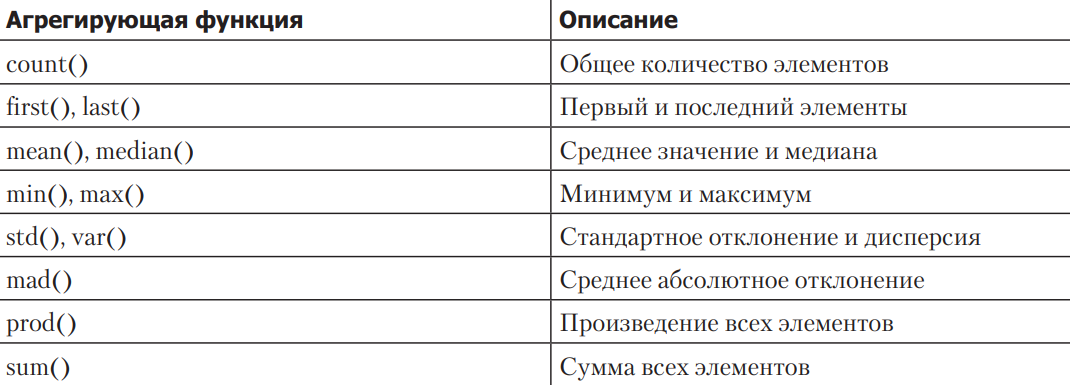

Функция groupby действует аналогично таковой в sql запросах, приведём её визуальное представление     
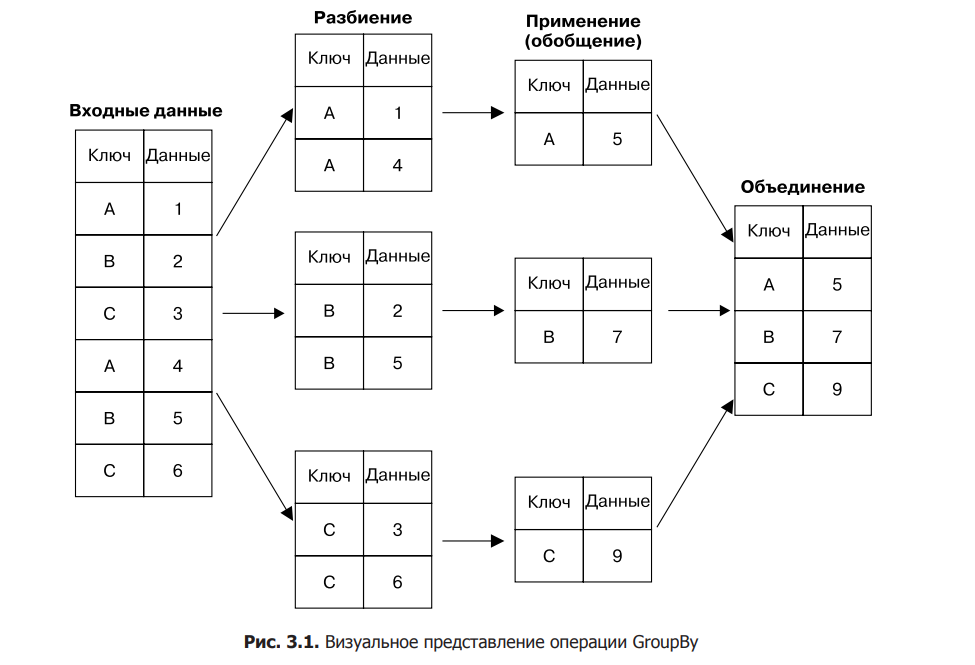

In [229]:
df = pd.DataFrame(
    {
        'key': ['A', 'B', 'C', 'A', 'B', 'C'],
        'data': range(6)
    }, 
    columns=['key', 'data']
)
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [230]:
gb = df.groupby('key')
gb

In [231]:
gb.mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [232]:
gb.max()

,data
key,
A,3
B,4
C,5


In [233]:
gb.sum()

,data
key,
A,3
B,5
C,7


In [234]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [235]:
pgb = planets.groupby('method')
pgb

In [236]:
pgb['number']

In [237]:
pgb['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [238]:
pgb[['orbital_period', 'mass']].max()

,orbital_period,mass
method,,
Astrometry,1016.000000,NaN
Eclipse Timing Variations,10220.000000,6.05
Imaging,730000.000000,NaN
Microlensing,5100.000000,NaN
Orbital Brightness Modulation,1.544929,NaN
Pulsar Timing,36525.000000,NaN
Pulsation Timing Variations,1170.000000,NaN
Radial Velocity,17337.500000,25.00
Transit,331.600590,1.47


Объект groupby поддерживает итерирование по нему

In [239]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


Методы, нереализованные для объекта groupby будут переданы далее и выполняться для групп, вне зависимости от того являюются они Series или DataFrame

In [240]:
pgb['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


У объектов groupby есть методы aggregate(), filter(), transform(), apply()

In [241]:
df = pd.DataFrame(
    {
        'key': list('ABCABC'),
        'data1': range(6),
        'data2': np.random.randint(0, 30, 6)
    },
    columns=['key', 'data1', 'data2']
)
df

,key,data1,data2
0,A,0,17
1,B,1,2
2,C,2,11
3,A,3,0
4,B,4,17
5,C,5,13


aggragate принимает на вход строки и вычисляет все сводные показатели сразу

In [242]:
df.groupby('key').aggregate(['max', 'median', 'mean'])

data1             data2             
      max median mean   max median  mean
key                                     
A       3    1.5  1.5    17    8.5   8.5
B       4    2.5  2.5    17    9.5   9.5
C       5    3.5  3.5    13   12.0  12.0

Можно передеть словарь, в котором 

In [243]:
df.groupby('key').aggregate({
    'data1': 'min',
    'data2': 'max'
})

,data1,data2
key,,
A,0,17
B,1,17
C,2,13


Метод filter фильтрует  записи на предмет удовлетворения некоторому условию

In [244]:
df.groupby('key').filter(lambda x: x['data2'].mean() > 7)

,key,data1,data2
0,A,0,17
1,B,1,2
2,C,2,11
3,A,3,0
4,B,4,17
5,C,5,13


Метод transform применяет указанное преобразование ко всей группе данных

In [245]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,8.5
1,-1.5,-7.5
2,-1.5,-1.0
3,1.5,-8.5
4,1.5,7.5
5,1.5,1.0


Метод apply применяет переданную функцию к результатам группировки (функция должна возвращать скаляр или объект Pandas)

In [246]:
def norm_by_data2(df):
    df['data1'] /= df['data2'].sum()
    return df

In [247]:
df.groupby('key').apply(norm_by_data2, include_groups=False)

data1  data2
key                   
A   0  0.000000     17
    3  0.176471      0
B   1  0.052632      2
    4  0.210526     17
C   2  0.083333     11
    5  0.208333     13

## Сводные таблицы

In [248]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Если мы хотим узнать количество выживших пассажиров разного класса и пола, то можно сделать это следующим образом

In [249]:
titanic.groupby(['sex', 'class'], observed=False)['survived'].aggregate('sum').unstack()

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


Есть и другой метод с более читаемым индексом, так называемые pivot_table - сводные таблицы

In [250]:
titanic.pivot_table(values='survived', index='sex', columns='class', observed=False, aggfunc='sum')

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


Есть возможность задавать многоуровневые таблицы, добавим ещё группировку по возрасту

In [251]:
age = pd.cut(titanic['age'], [0, 18, 50, 80])

In [252]:
titanic.pivot_table(values='survived', index=['sex', age], columns='class', aggfunc='sum', observed=False)

class            First  Second  Third
sex    age                           
female (0, 18]      10      14     22
       (18, 50]     59      52     24
       (50, 80]     13       2      1
male   (0, 18]       4       9     11
       (18, 50]     31       5     27
       (50, 80]      5       1      0

Можно так делать и со столбцами, добавим ещё стоимость билета (pd.qcut автоматически вычисляет квантили)

In [253]:
# медиана берётся по всем классам
fare = pd.qcut(titanic['fare'], q=2)
titanic.pivot_table('survived', ['sex', age], ['class', fare], aggfunc='sum', observed=False)

class                      First                             Second  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                            
female (0, 18]                 0                10                3   
       (18, 50]                0                59               22   
       (50, 80]                0                13                0   
male   (0, 18]                 0                 4                0   
       (18, 50]                0                31                4   
       (50, 80]                0                 5                1   

class                                        Third                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                            
female (0, 18]                 11               15                 7  
       (18, 50]                30               15                 9  
       (50, 80]                 2                1                 0  
male   (0, 18]                  9                6                 5  
       (18, 50]                 1               22                 5  
       (50, 80]                 0                0                 0

In [254]:
# для каждого класса своя медиана
fare = titanic.groupby('class', observed=False)['fare'].transform(lambda x: pd.qcut(x, q=2, labels=['Low', 'Hight']))
titanic.pivot_table('survived', ['sex', age], ['class', fare], aggfunc='sum', observed=False)

class           First       Second       Third      
fare              Low Hight    Low Hight   Low Hight
sex    age                                          
female (0, 18]      3     7      3    11     7    15
       (18, 50]    17    42     22    30    11    13
       (50, 80]     3    10      0     2     0     1
male   (0, 18]      0     4      0     9     2     9
       (18, 50]    21    10      4     1    19     8
       (50, 80]     4     1      1     0     0     0

aggfunc может быть словарём

In [255]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': 'sum', 'fare':'mean'}, observed=False)

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

аргумент margins позволяет вычислять итоги по каждой группе

In [256]:
titanic.pivot_table(values = 'survived', index='sex', columns='class', observed=False, margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Векторизованные операции над строками

In [257]:
names = pd.Series(['peter', 'Paul', 'MARY', 'gUIDO'])
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

Зачастую, данные содержат неточности, пропуски и тп, из-за чего их нужно предварительно обрабатывать. Чтобы делать это быстро в случае строковых данных, реализованы векторизованные операции над строками

In [258]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [259]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', np.nan, 'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3               NaN
4         Eric Idle
5       Terry Jones
6     Michael Palin
dtype: object

Практически для всех встроенных строковых методов Python есть соответствующий векторизованный строковый метод библиотеки Pandas. Приведём их список     
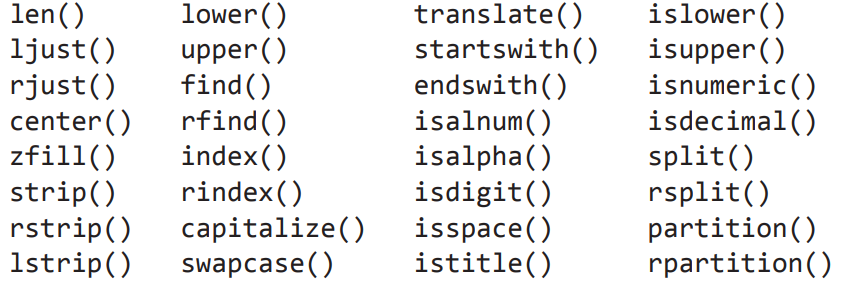

In [260]:
monte.str.len()

0    14.0
1    11.0
2    13.0
3     NaN
4     9.0
5    11.0
6    13.0
dtype: float64

In [261]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3                  NaN
4         [Eric, Idle]
5       [Terry, Jones]
6     [Michael, Palin]
dtype: object

Так же есть методы, принимающих на входе регулярные выражения    
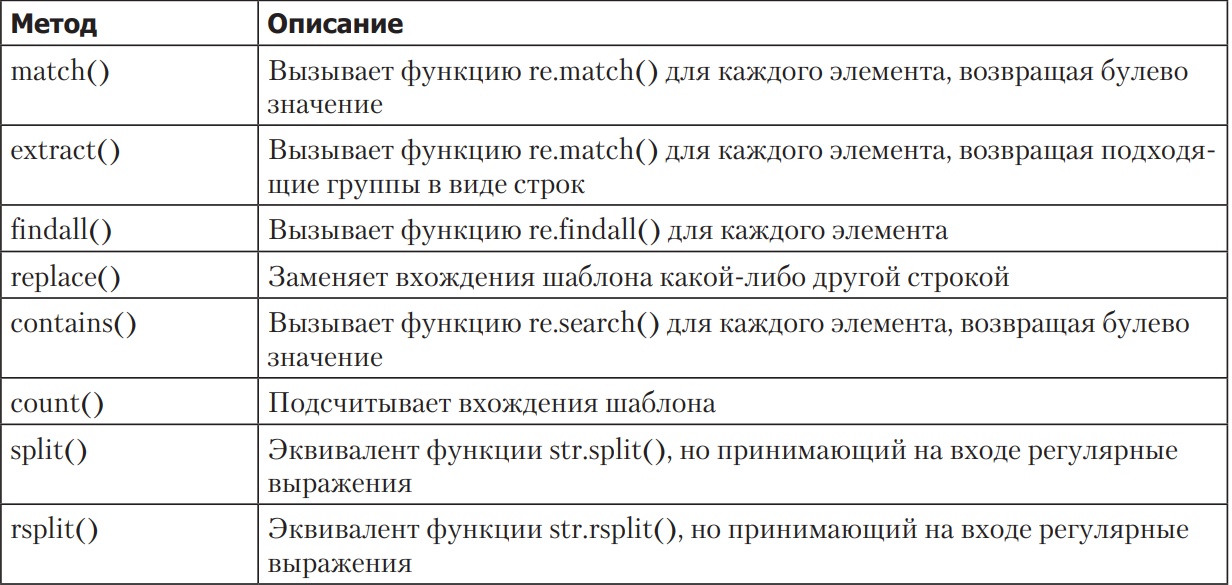

In [262]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,NaN
4,Eric
5,Terry
6,Michael


Существуют и прочие методы, приведём их список     
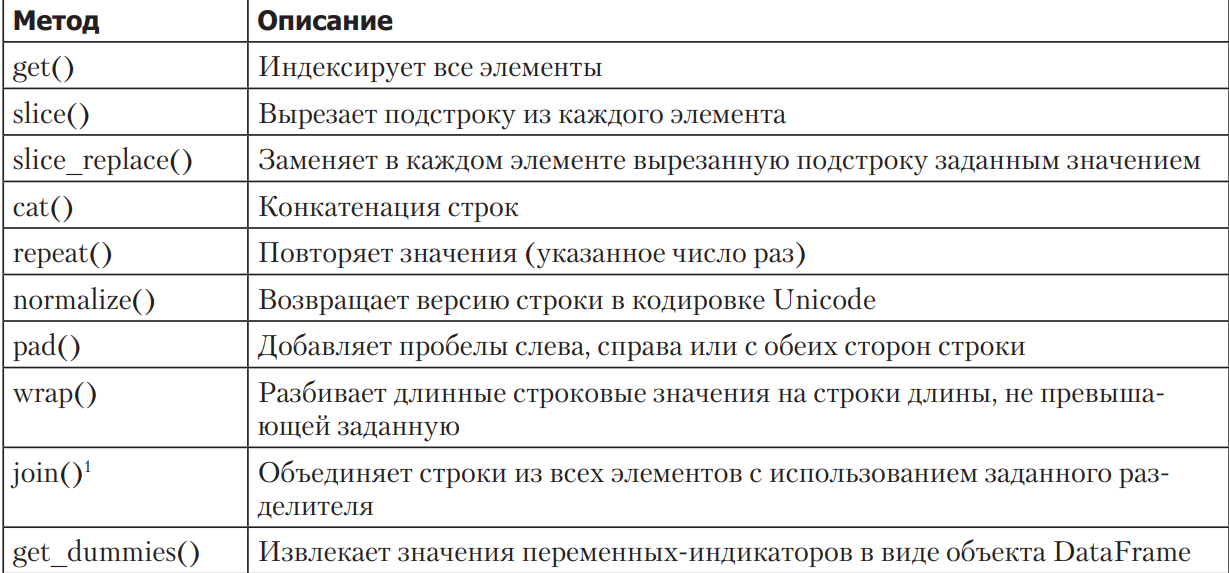

In [263]:
monte.str.get(2)

0      a
1      h
2      r
3    NaN
4      i
5      r
6      c
dtype: object

In [264]:
monte.str[2]

0      a
1      h
2      r
3    NaN
4      i
5      r
6      c
dtype: object

In [265]:
monte.str.slice(0, 4)

0    Grah
1    John
2    Terr
3     NaN
4    Eric
5    Terr
6    Mich
dtype: object

In [266]:
monte.str[0:4]

0    Grah
1    John
2    Terr
3     NaN
4    Eric
5    Terr
6    Mich
dtype: object

Пусть имеется набор данных, содержащий кодированный индикатор

In [267]:
full_monte = pd.DataFrame({
    'name': monte,
    'info': ['B|C|D', 'B|D', 'A|C', np.nan, 'B|D', 'B|C', 'B|C|D']
})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,NaN,NaN
4,Eric Idle,B|D
5,Terry Jones,B|C
6,Michael Palin,B|C|D


Метод get_dummies() даёт возможность быстро разбить все индикаторные переменные, преобразовав их в DataFrame

In [268]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,0,0,0
4,0,1,0,1
5,0,1,1,0
6,0,1,1,1


## Работа с временными рядами

### Дата и время в языке Python

Встроенные пакеты datetime и dateutil содержит базовые объекты для работы с датами и временем

In [269]:
import datetime
import dateutil

Можно вручную сформировать дату с помощью типа datetime

In [270]:
datetime.datetime(year=2024, month=9, day=17)

datetime.datetime(2024, 9, 17, 0, 0)

Модуль dateutil позволяет выполнять синтаксический разбор дат, находящихся во множестве строковых форматов

In [271]:
date = dateutil.parser.parse("2024, 17th of September")
date

datetime.datetime(2024, 9, 17, 0, 0)

datetime позволяет выводить день недели

In [272]:
date.strftime('%A')

'Tuesday'

Эти пакеты могут сделать все действия с датами, которые могут понадобиться, но у них есть минус - они очень медленно работают на больших массивах данных

В связи с этим, в NumPy реализован тип datetime64, представляющий дату как 64-битное целое число

In [273]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Такая реализация позволяет быстро выполнять векторизованные операции над датами

In [274]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

### Временные ряды библиотеки Pandas

Библиотека Pandas предоставляет, основываясь на всех только что обсуждавшихся инструментах, объект Timestamp, сочетающий удобство использования datetime и dateutil с эффективным хранением и векторизованным интерфейсом типа numpy.datetime64

In [275]:
date = pd.to_datetime('2024, 17th of September')
date

Timestamp('2024-09-17 00:00:00')

In [276]:
date.strftime('%A')

'Tuesday'

In [277]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24',
               '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-28'],
              dtype='datetime64[ns]', freq=None)

In [278]:
idx= (date + pd.to_timedelta(np.arange(12), 'D'))[:4]
idx

DatetimeIndex(['2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20'], dtype='datetime64[ns]', freq=None)

In [279]:
data = pd.Series([0, 1, 2, 3], index=idx)
data

2024-09-17    0
2024-09-18    1
2024-09-19    2
2024-09-20    3
dtype: int64

ТЕперь, когда данные находятся в объекте Series, можно применять к ним все известные методы этого класса

In [280]:
data.loc['2024-09-18':'2024-09-20':2]

2024-09-18    1
2024-09-20    3
dtype: int64

In [281]:
data['2024']

2024-09-17    0
2024-09-18    1
2024-09-19    2
2024-09-20    3
dtype: int64

### Структуры данных для временных рядов библиотеки Pandas

Библиотека Pandas предоставляет следующие типы данных для работы с датами и временем:

- **Timestamp**: Замена нативного типа `datetime` в Python, основана на `numpy.datetime64`.
- **DatetimeIndex**: Индекс для временных меток.
- **Period**: Кодирует интервалы времени фиксированной периодичности, основана на `numpy.datetime64`.
- **PeriodIndex**: Индекс для периодов времени.
- **Timedelta**: Эффективная замена `datetime.timedelta`, основана на `numpy.timedelta64`.
- **TimedeltaIndex**: Индекс для временных дельт.

Для преобразования строк и других объектов в TimeStamp используется функция pd.to_datetime(), возвращающая индекс дат при передаче ей списка значений

In [282]:
dates = pd.to_datetime([datetime.datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Объект DatetimeIndex можно преобразовать в PeriodIndex с помощью функции to_period()

In [283]:
# 'D' указывает на то, что периодиночсть интервала - один день
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [284]:
dates.to_period('W')

PeriodIndex(['2015-06-29/2015-07-05', '2015-06-29/2015-07-05',
             '2015-07-06/2015-07-12', '2015-07-06/2015-07-12',
             '2015-07-06/2015-07-12'],
            dtype='period[W-SUN]')

Объект TimedeltaIndex создается, например, при вычитании одной даты из другой

In [285]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

Для создания временных последствий есть аналоги функции range:   
pd.date_range()   
pd.period_range()    
pr.timedelta_range()

In [286]:
pd.date_range('2024-09-17', '2024-09-20')

DatetimeIndex(['2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20'], dtype='datetime64[ns]', freq='D')

In [287]:
pd.date_range('2024-09-17', periods=4, freq='h')

DatetimeIndex(['2024-09-17 00:00:00', '2024-09-17 01:00:00',
               '2024-09-17 02:00:00', '2024-09-17 03:00:00'],
              dtype='datetime64[ns]', freq='h')

In [288]:
pd.period_range('2024-09', periods=4, freq='M')

PeriodIndex(['2024-09', '2024-10', '2024-11', '2024-12'], dtype='period[M]')

In [289]:
pd.period_range('2024-09', periods=4, freq='D')

PeriodIndex(['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04'], dtype='period[D]')

In [290]:
pd.timedelta_range(0, periods=4, freq='h')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00'],
               dtype='timedelta64[ns]', freq='h')

Приведём список кодов периодичности(некоторые коды разработчики планируют заменить, например T на min, H на h) 
   
   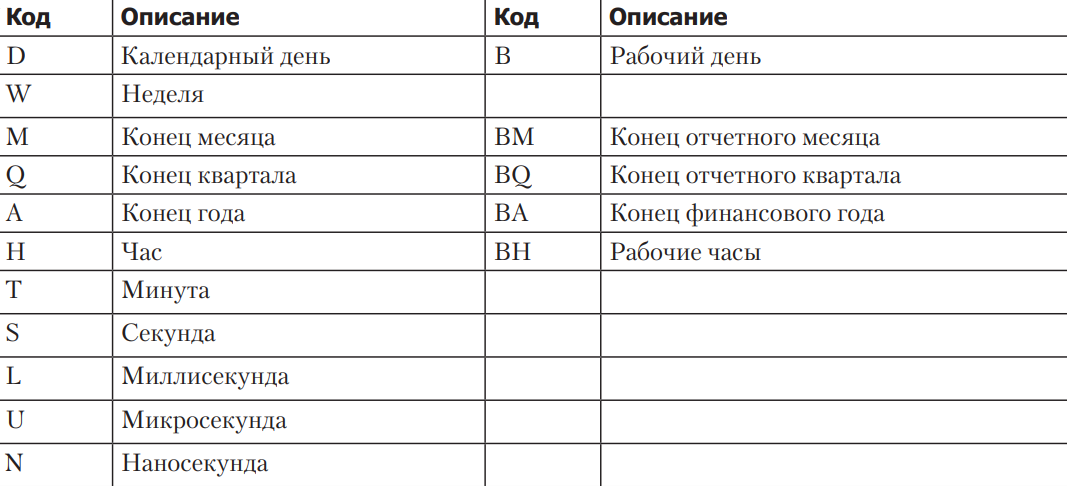

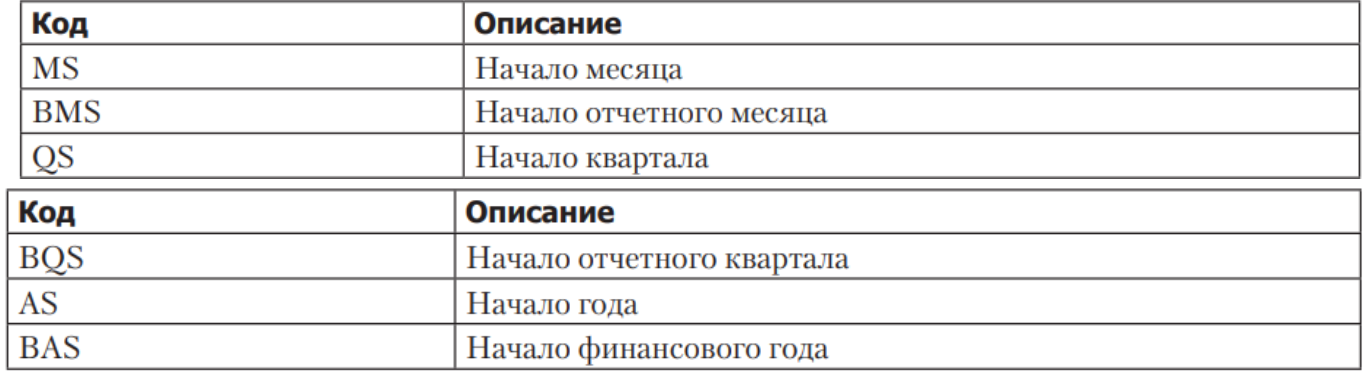

Кроме этого, можно изменить используемый для определения квартала или года месяц с помощью добавления в конец кода месяца, состоящего из трех букв     
   
   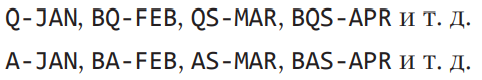

Аналогичным образом можно изменить точку разбиения для недельной периодичности, добавив состоящий из трех букв код дня недели    
   
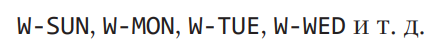

Можно сочетать коды с числами

In [291]:
pd.timedelta_range(0, periods=4, freq='1h15min')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:15:00', '0 days 02:30:00',
                '0 days 03:45:00'],
               dtype='timedelta64[ns]', freq='75min')

### Передискретизация, временные сдвиги и окна

In [292]:
import yfinance as yf

symbol = 'GOOG'
start_date = '2004-01-01'
end_date = '2016-12-31'

goog = yf.download(symbol, start=start_date, end=end_date)

goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.493011,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.691030,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.718112,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.605561,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.633636,184645512


In [293]:
goog = goog['Close']
goog.head()

Date
2004-08-19    2.499133
2004-08-20    2.697639
2004-08-23    2.724787
2004-08-24    2.611960
2004-08-25    2.640104
Name: Close, dtype: float64

В этом разделе будут показаны примеры на основе цен акций гугл в некотором временном промежутке

<Axes: xlabel='Date'>

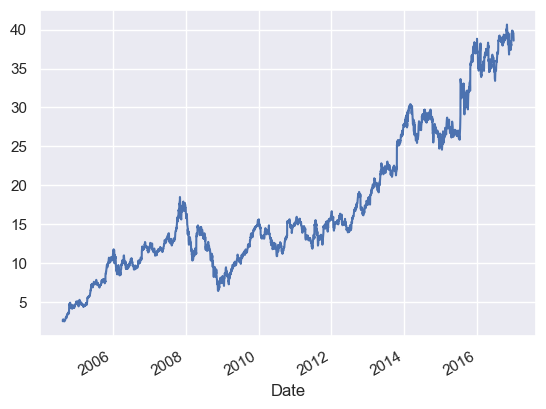

In [294]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot()

#### Передискретизация и изменение периодичности интервалов

Переразбить данные можно с использованием интервалов другой переодичности существуют методы resample() и asfreq(). Разница между ними состоит в том, что метод resample выполняет агрегирование данных, а freq выполняет выборку

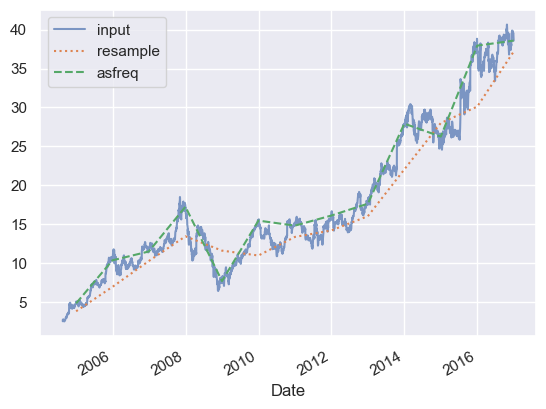

In [295]:
goog.plot(alpha=0.7, style='-')
goog.resample('BYE').mean().plot(style=':') #считает среднее значение за год
goog.asfreq('BYE').plot(style='--')  #выбирает значение на конец года
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

При повышающей дискретизации методы ведут себя практически индентично. Они оставляют NA значения на месте пропущенных данных, но допускают параметры fill_na и method, заполняющие эти значения. Например при повышающей дескретизации с периодом в день (до этого период был по рабочим дням):

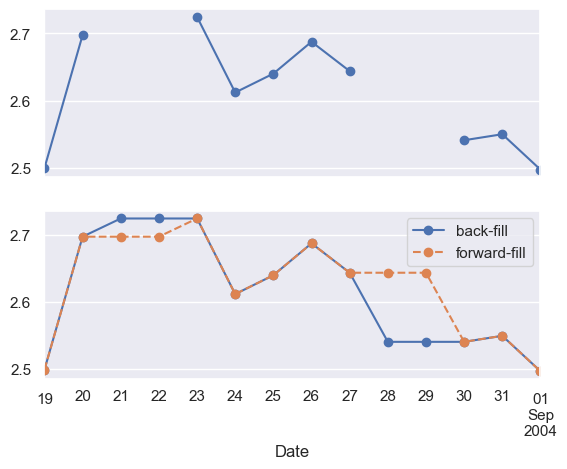

In [296]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

## Увеличение производительности библиотеки Pandas: eval() и query()

In [297]:
import numexpr

Библиотеки NumPy и Pandas обеспечивают быстрые векторизованные операции, но при вычислении составных выражений эффективность снижается из-за выделения памяти под промежуточные результаты. Numexpr решает эту проблему, вычисляя выражения поэлементно без создания полных временных массивов. Функция numexpr.evaluate() принимает строку с выражением и возвращает результат, потребляя меньше памяти и времени, особенно для больших массивов. Инструменты query() и eval() используют аналогичный подход, основанный на Numexpr.

In [298]:
x, y = np.random.randint(0, 1000000, 1000000), np.random.randint(0, 1000000, 1000000)
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [299]:
# проверяем, что mask и mask_numexpr - одно и то же
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

Функция eval() библиотеки Pandas применяет строковые выражения для эффективных вычислительных операций с объектами DataFrame

In [300]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [301]:
%timeit df1 + df2 + df3 + df4

229 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [302]:
%timeit pd.eval('df1 + df2 + df3 + df4')

92.2 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [303]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

Видим, что версия выражения с eval работает быстрее (а ещё расходует меньше памяти)

**Основные категории операций:**

* **Арифметические:**
    * `+` (сложение)
    * `-` (вычитание)
    * `*` (умножение)
    * `/` (деление)
    * `//` (целочисленное деление)
    * `%` (остаток от деления)
    * `**` (возведение в степень)
* **Логические:**
    * `&` (логическое И)
    * `|` (логическое ИЛИ)
    * `~` (логическое НЕ)
    * `and` (логическое И)
    * `or` (логическое ИЛИ)
    * `not` (логическое НЕ)
    * `<`, `>`, `<=`, `>=`, `==`, `!=` (операторы сравнения)
* **Операции с DataFrame/Series:**
    * Доступ к столбцам: `df['column_name']`
    * Индексация: `df.loc[row_indexer, column_indexer]`
    * Булевы маски для выбора строк/столбцов
    * Функции: `.sum()`, `.mean()`, `.std()` и др.
* **Другие:**
    * Вызовы методов: `.str.lower()`, `.str.upper()` 
    * Доступ к атрибутам: `.shape`, `.size`
    * Встроенные функции: `len()`, `sum()`, `min()`, `max()`

In [304]:
np.allclose(
    (df1 < df2) & (df2 <= df3) & (df3 != df4),
    pd.eval('df1 < df2 <= df3 != df4')
)

True

In [305]:
np.allclose(
    (df1 < 0.5) & (df2 < 0.5) | (df3 < df4),
    pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
)

True

In [306]:
np.allclose(
    df2.T[0] + df3.iloc[1],
    pd.eval('df2.T[0] + df3.iloc[1]')
)

True

У объектов DataFrame есть метод eval, который позволяет выполнять операции над столбцами

In [307]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


In [308]:
np.allclose(
    (df['A'] + df['B']) / df['C'],
    df.eval('(A + B) / C')
)

True

Метол так же позволяет создавать новый столбец или изменять имеющийся, присваивать ему значения, вычисленные на основе других столбцов

In [309]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.615875,0.525167,0.047354,24.095868
1,0.330858,0.412879,0.441564,1.684325
2,0.689047,0.559068,0.230350,5.418335
3,0.290486,0.695479,0.852587,1.156439
4,0.424280,0.534344,0.245216,3.909296


In [310]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.615875,0.525167,0.047354,1.915527
1,0.330858,0.412879,0.441564,-0.185752
2,0.689047,0.559068,0.230350,0.564268
3,0.290486,0.695479,0.852587,-0.475016
4,0.424280,0.534344,0.245216,-0.448844


Метод DataFrame.eval() поддерживает дополнительный синтаксис для работы с локальными переменными языка Python

In [311]:
column_mean = df.mean(1)
np.allclose(
    df['A'] + column_mean,
    df.eval('A + @column_mean')
)

True

Cимвол @ поддерживается лишь методом DataFrame.eval(), но не функцией pandas.eval(), поскольку у функции pandas.eval() есть доступ только к одному пространству имен (языка Python)

У объектов DataFrame есть еще один метод, основанный на вычислении строк, именуемый query(). Используется он для операций фильтрации

In [312]:
np.allclose(
    df[(df.A < 0.5) & (df.B < 0.5)],
    df.query('A < 0.5 and B < 0.5')
)

True

Метод работает с флагом @

In [313]:
Cmean = df['C'].mean()
np.allclose(
    df[(df.A < Cmean) & (df.B < Cmean)],
    df.query('A < @Cmean and B < @Cmean')
)

True

Если размер временных объектов DataFrame существенен по сравнению с доступной оперативной памятью вашей системы, то будет разумно воспользоваться выражениями eval() или query()